# Data preprocessing before alignment using Morpho

## Packages

In [1]:
import os
import sys
from pathlib import Path
import anndata as ad
import numpy as np

sys.path.insert(0, "/home/yao/PythonProject/Yao_packages/morpho")
import morpho
import dynamo as dyn

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


## Data source

In [2]:
os.chdir("/media/yao/Yao/Projects/Project_morpho/slices-E8-10_b")
save_image_folder = "slices_image"
Path(save_image_folder).mkdir(parents=True, exist_ok=True)

In [3]:
slice1 = ad.read_h5ad("cellbin_h5ad/E8-10_b_S11.h5ad")
slice1.layers["X_counts"] = slice1.X.copy()
slice2 = ad.read_h5ad("cellbin_h5ad/E8-10_b_S12.h5ad")
slice2.layers["X_counts"] = slice2.X.copy()
slice1, slice2

(AnnData object with n_obs × n_vars = 1244 × 8992
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial'
     layers: 'X_counts',
 AnnData object with n_obs × n_vars = 1715 × 9145
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial'
     layers: 'X_counts')

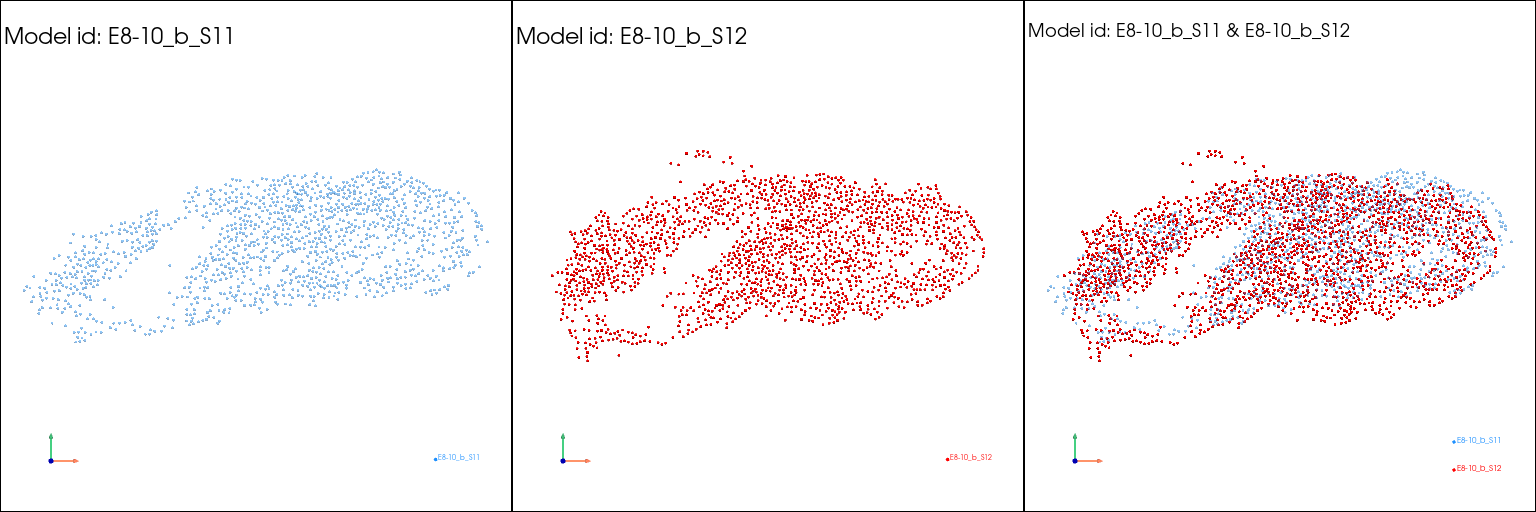

In [4]:
morpho.multi_models(
    [slice1, slice2], spatial_key="spatial", center_zero=True, id_key="slices", jupyter="static", mode="both",
    filename=os.path.join(save_image_folder, "E8-10_b_pairwise_raw_spatial_slices.pdf")
)

## Morpho preprocessing

## Calculate gene expression similarity using raw gene expression matrix

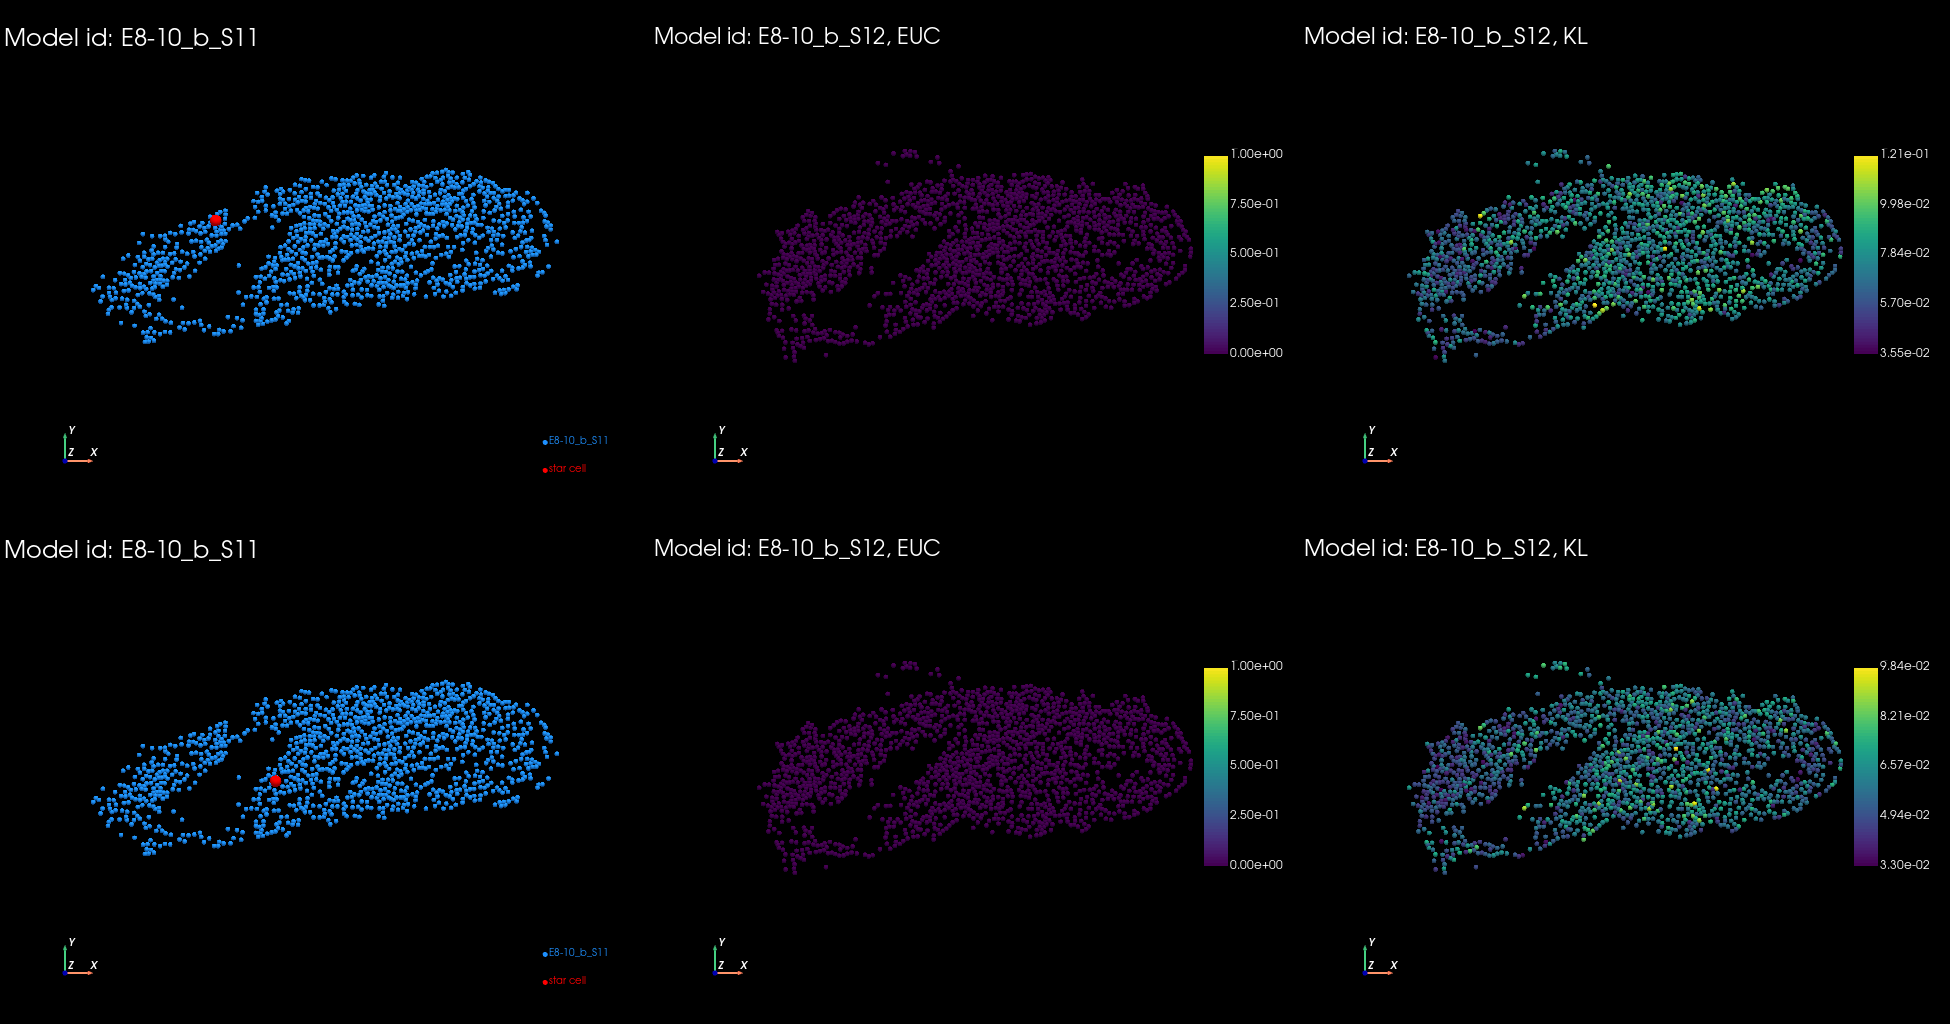

In [5]:
morpho.pairwise_exp_similarity(
    adataA=slice1,
    adataB=slice2,
    cells=[200, 300],
    filename=os.path.join(save_image_folder, "E8-10_b_pairwise_morpho_raw_geneexp_similarity.pdf"),
    jupyter="static",
    window_size = (650, 512)
)

## Calculate gene expression similarity using normalized gene expression matrix

In [6]:
normalized_slice1 = slice1.copy()
normalized_slice1.X = normalized_slice1.layers["X_counts"].copy()
normalized_slice1.uns["pp"] = {}
dyn.pp.normalize_cell_expr_by_size_factors(adata=normalized_slice1, layers="X", X_total_layers=True, skip_log=False)

normalized_slice2 = slice2.copy()
normalized_slice2.X = normalized_slice2.layers["X_counts"].copy()
normalized_slice2.uns["pp"] = {}
dyn.pp.normalize_cell_expr_by_size_factors(adata=normalized_slice2, layers="X", X_total_layers=True, skip_log=False)

|-----> rounding expression data of layer: X during size factor calculation
|-----> size factor normalize following layers: ['X']
|-----? `total_szfactor` is not `None` and it is not in adata object.
|-----> applying <ufunc 'log1p'> to layer<X>
|-----> set adata <X> to normalized data.
|-----> <insert> pp.norm_method to uns in AnnData Object.
|-----> rounding expression data of layer: X during size factor calculation
|-----> size factor normalize following layers: ['X']
|-----? `total_szfactor` is not `None` and it is not in adata object.
|-----> applying <ufunc 'log1p'> to layer<X>
|-----> set adata <X> to normalized data.
|-----> <insert> pp.norm_method to uns in AnnData Object.


AnnData object with n_obs × n_vars = 1715 × 9145
    obs: 'area', 'slices', 'Size_Factor', 'initial_cell_size'
    uns: '__type', 'spatial', 'pp'
    obsm: 'bbox', 'contour', 'spatial'
    layers: 'X_counts'

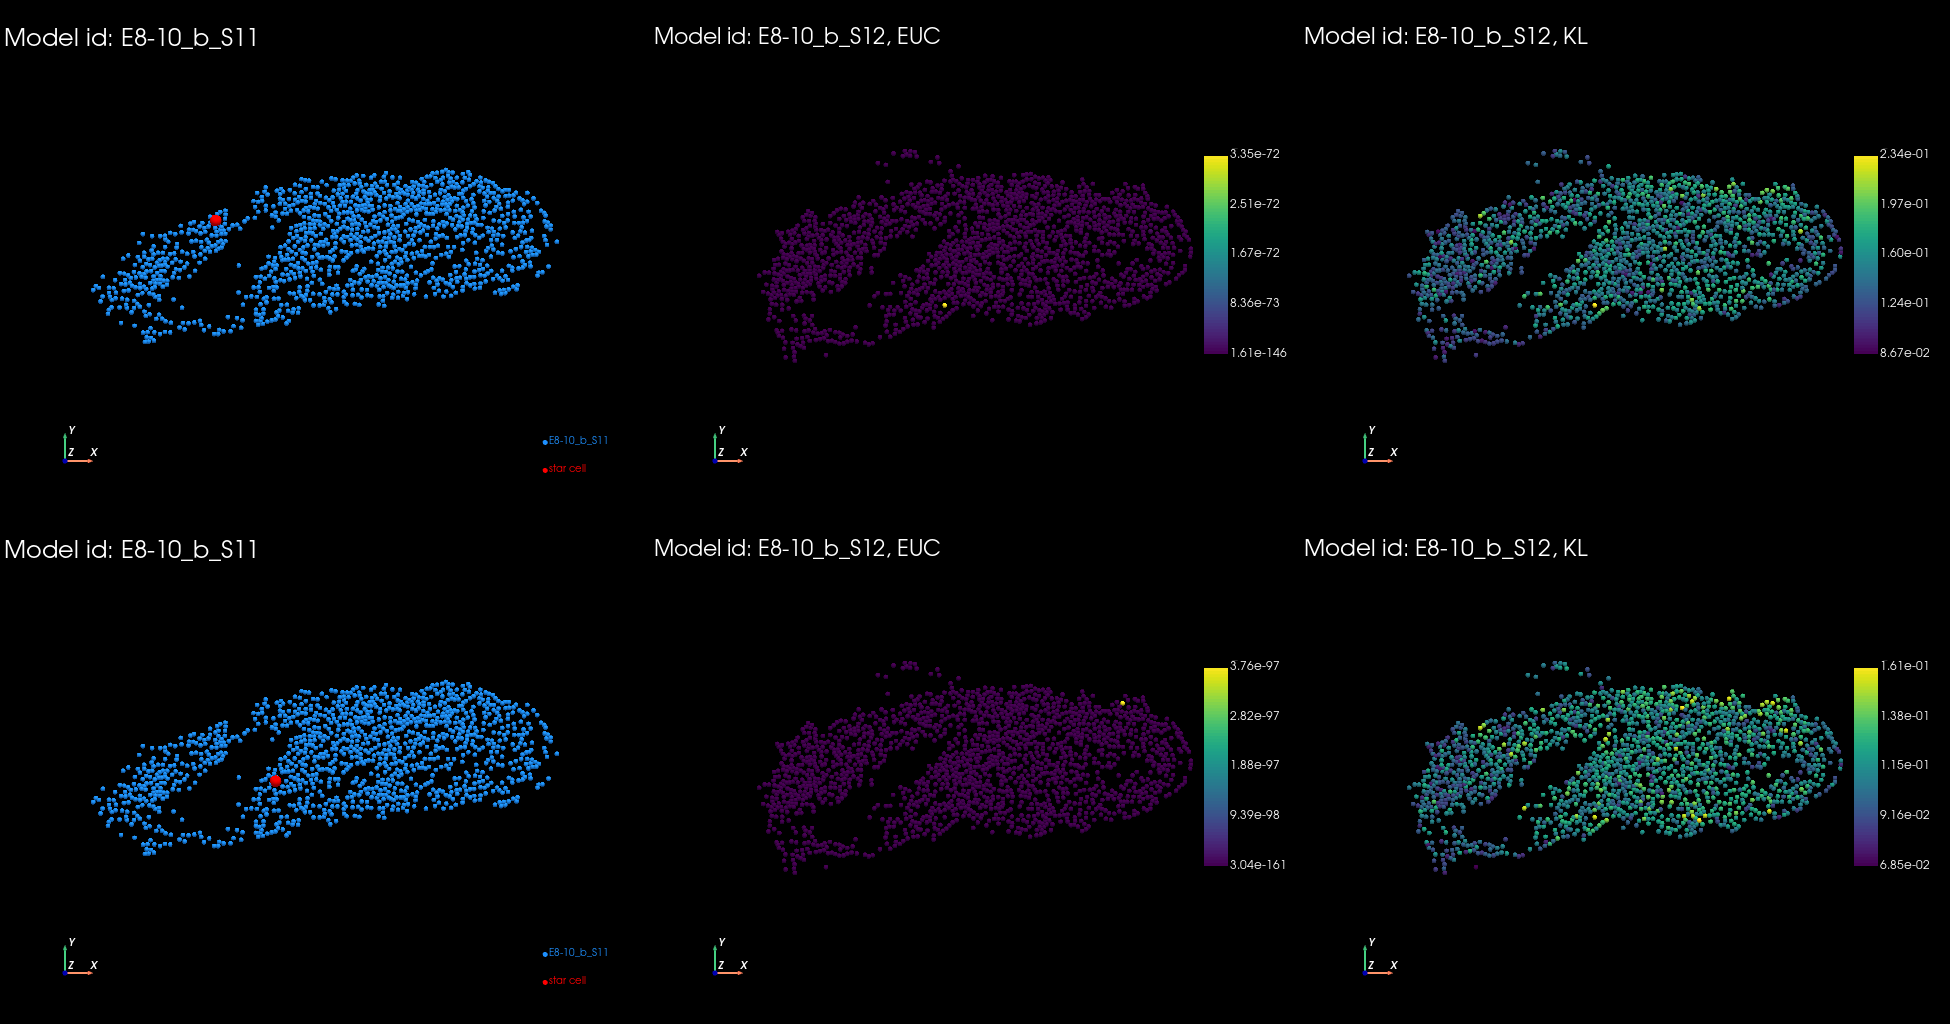

In [7]:
morpho.pairwise_exp_similarity(
    adataA=normalized_slice1,
    adataB=normalized_slice2,
    cells=[200, 300],
    filename=os.path.join(save_image_folder, "E8-10_b_pairwise_morpho_normalized_geneexp_similarity.pdf"),
    jupyter="static",
    window_size = (650, 512)
)

## Calculate gene expression similarity using raw hvg gene expression matrix

In [8]:
import scanpy as sc
hvg_slice1 = slice1.copy()
sc.pp.highly_variable_genes(adata=hvg_slice1, n_top_genes=2000, inplace=True)
hvg_slice1 = hvg_slice1[:, hvg_slice1.var["highly_variable"]]

hvg_slice2 = slice2.copy()
sc.pp.highly_variable_genes(adata=hvg_slice2, n_top_genes=2000, inplace=True)
hvg_slice2 = hvg_slice2[:, hvg_slice2.var["highly_variable"]]

hvg_slice1, hvg_slice2

(View of AnnData object with n_obs × n_vars = 1244 × 2000
     obs: 'area', 'slices'
     var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: '__type', 'spatial', 'hvg'
     obsm: 'bbox', 'contour', 'spatial'
     layers: 'X_counts',
 View of AnnData object with n_obs × n_vars = 1715 × 2000
     obs: 'area', 'slices'
     var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: '__type', 'spatial', 'hvg'
     obsm: 'bbox', 'contour', 'spatial'
     layers: 'X_counts')

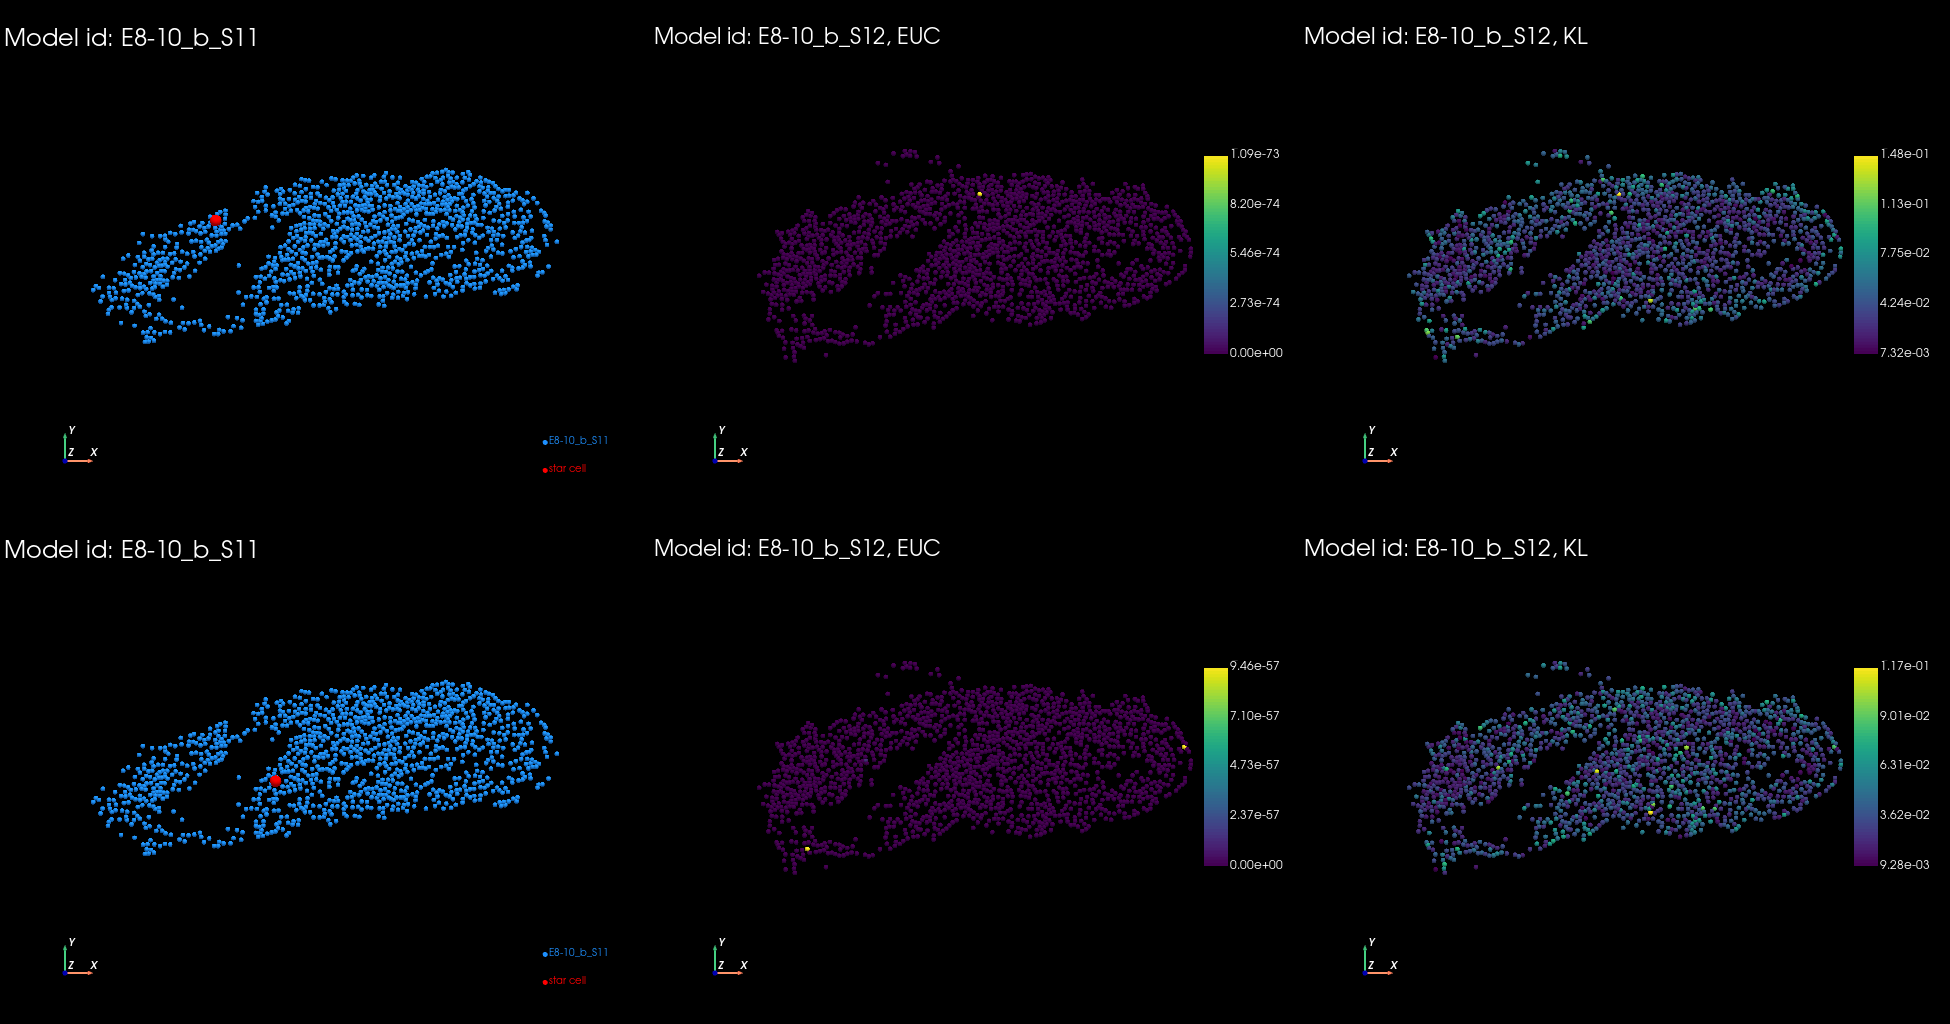

In [9]:
morpho.pairwise_exp_similarity(
    adataA=hvg_slice1,
    adataB=hvg_slice2,
    cells=[200, 300],
    filename=os.path.join(save_image_folder, "E8-10_b_pairwise_morpho_raw_hvg_geneexp_similarity.pdf"),
    jupyter="static",
    window_size = (650, 512)
)

## Calculate gene expression similarity using normalized hvg gene expression matrix

In [10]:
normalized_hvg_slice1 = hvg_slice1.copy()
normalized_hvg_slice1.X = normalized_hvg_slice1.layers["X_counts"].copy()
normalized_hvg_slice1.uns["pp"] = {}
dyn.pp.normalize_cell_expr_by_size_factors(adata=normalized_hvg_slice1, layers="X", X_total_layers=True, skip_log=False)

normalized_hvg_slice2 = hvg_slice2.copy()
normalized_hvg_slice2.X = normalized_hvg_slice2.layers["X_counts"].copy()
normalized_hvg_slice2.uns["pp"] = {}
dyn.pp.normalize_cell_expr_by_size_factors(adata=normalized_hvg_slice2, layers="X", X_total_layers=True, skip_log=False)

|-----> rounding expression data of layer: X during size factor calculation
|-----> size factor normalize following layers: ['X']
|-----? `total_szfactor` is not `None` and it is not in adata object.
|-----> applying <ufunc 'log1p'> to layer<X>
|-----> set adata <X> to normalized data.
|-----> <insert> pp.norm_method to uns in AnnData Object.
|-----> rounding expression data of layer: X during size factor calculation
|-----> size factor normalize following layers: ['X']
|-----? `total_szfactor` is not `None` and it is not in adata object.
|-----> applying <ufunc 'log1p'> to layer<X>
|-----> set adata <X> to normalized data.
|-----> <insert> pp.norm_method to uns in AnnData Object.


AnnData object with n_obs × n_vars = 1715 × 2000
    obs: 'area', 'slices', 'Size_Factor', 'initial_cell_size'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: '__type', 'spatial', 'hvg', 'pp'
    obsm: 'bbox', 'contour', 'spatial'
    layers: 'X_counts'

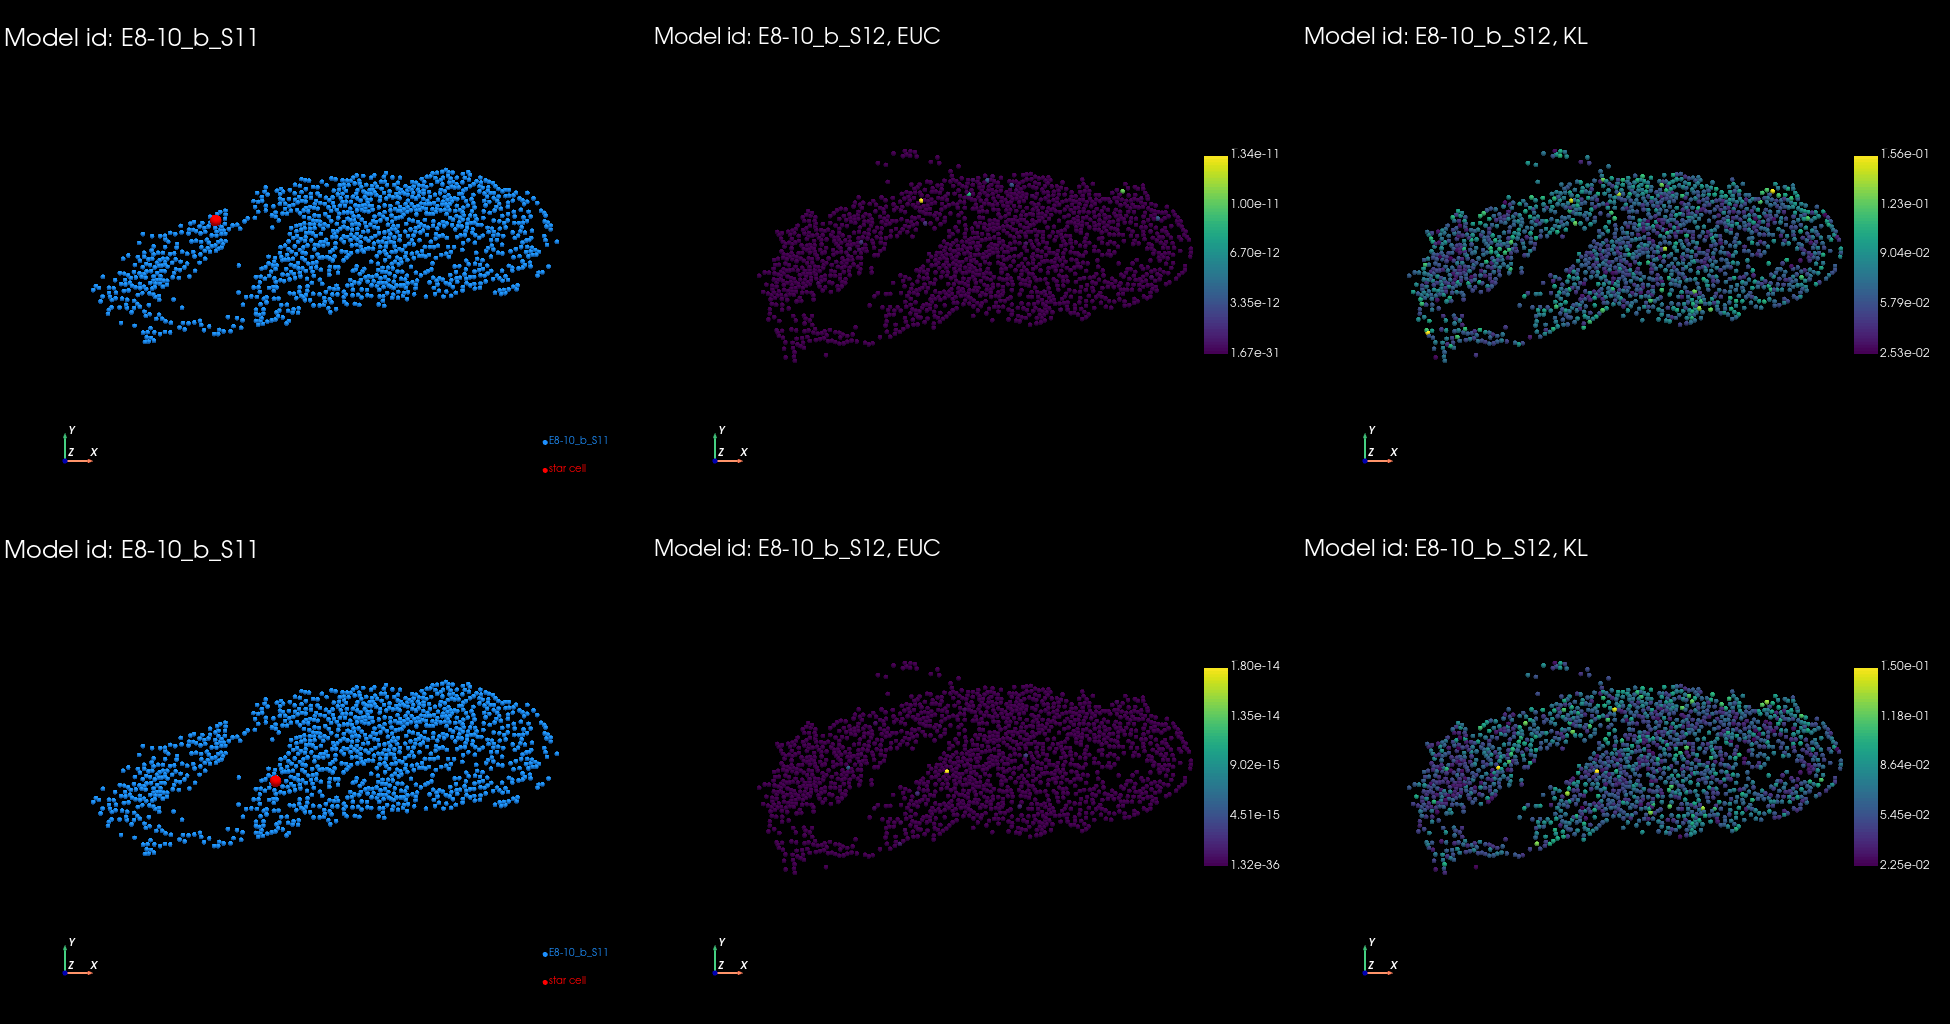

In [11]:
morpho.pairwise_exp_similarity(
    adataA=normalized_hvg_slice1,
    adataB=normalized_hvg_slice2,
    cells=[200, 300],
    filename=os.path.join(save_image_folder, "E8-10_b_pairwise_morpho_normalized_hvg_geneexp_similarity.pdf"),
    jupyter="static",
    window_size = (650, 512)
)